In [1]:
import numpy
import cupy
import cv2
import matplotlib.pyplot as plt

In [2]:
coef_r = 0.299
coef_g = 0.587
coef_b = 0.114

# Read image and convert to RGB

In [3]:
image = cv2.imread("cat.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

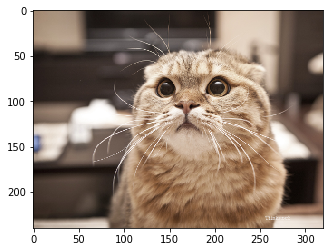

In [4]:
plt.imshow(image)

# Opencv RGB2GRAY convert reference

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

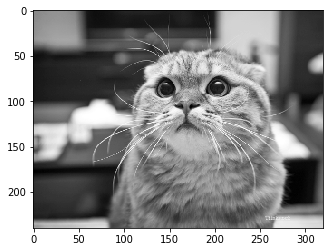

In [6]:
plt.imshow(gray, cmap = "gray")

In [7]:
%timeit cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

62.9 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# First implementation: double for loops

In [8]:
def rgb2gray_xy(img_in):
    img_gray = numpy.zeros((img_in.shape[0], img_in.shape[1]))
    for x in range(img_in.shape[1]):
        for y in range(img_in.shape[0]):
            img_gray[y, x] = coef_r * img_in[y, x, 0] + coef_g * img_in[y, x, 1] + coef_b * img_in[y, x, 2]
            
    return img_gray
            

In [9]:
gray_xy = rgb2gray_xy(image)
numpy.testing.assert_allclose(gray, gray_xy, atol=10-4)

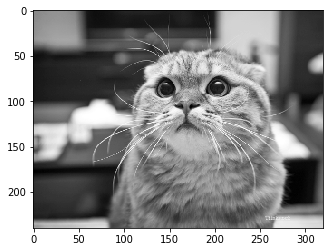

In [10]:
plt.imshow(gray, cmap='gray')

In [11]:
%timeit rgb2gray_xy(image)

274 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Second implementation: one for loop

In [12]:
def rgb2gray_y(img_in):
    img_gray = numpy.zeros((img_in.shape[0], img_in.shape[1]))
    for y in range(img_in.shape[0]):
        img_gray[y, :] = coef_r * img_in[y, :, 0] + coef_g * img_in[y, :, 1] + coef_b * img_in[y, :, 2]
            
    return img_gray

In [13]:
gray_y = rgb2gray_y(image)
numpy.testing.assert_allclose(gray, gray_y, atol=10-4)

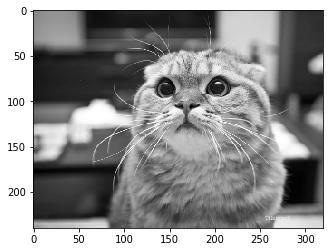

In [14]:
plt.imshow(gray_y, cmap='gray')

In [15]:
%timeit rgb2gray_y(image)

1.23 ms ± 962 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Third implementation: matrix broadcast

In [16]:
def rgb2gray_rgb(img_in):
    r,g,b = numpy.dsplit(img_in, 3)
    img_gray = coef_r * r + coef_g * g + coef_b * b
    
    return numpy.squeeze(img_gray, axis=2)

In [17]:
gray_rbg = rgb2gray_rgb(image)
numpy.testing.assert_allclose(gray, gray_rbg, atol=10-4)

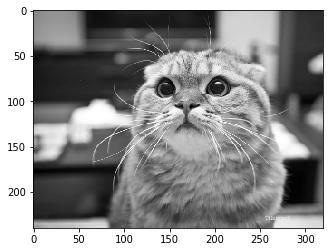

In [18]:
plt.imshow(gray_rbg, cmap='gray')

In [19]:
%timeit rgb2gray_rgb(image)

330 µs ± 225 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Fourth implementation: matrix dot-product

In [20]:
def rgb2gray_dot(img_in):
    coef = numpy.array([coef_r, coef_g, coef_b])
    img_gray = numpy.matmul(img_in, coef)
    return img_gray

In [21]:
gray_dot = rgb2gray_dot(image)
numpy.testing.assert_allclose(gray, gray_dot, atol=10-4)

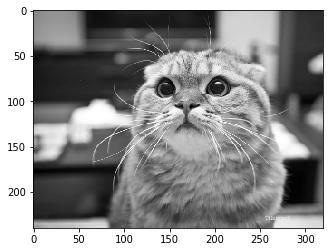

In [22]:
plt.imshow(gray_dot, cmap = 'gray')

In [23]:
%timeit rgb2gray_dot(image)

350 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Fifth implementation: cupy matrix broadcast

In [24]:
def rgb2gray_rgb_cupy(img_in_cupy):
    r,g,b = cupy.dsplit(img_in_cupy, 3)
    img_gray = coef_r * r + coef_g * g + coef_b * b
    
    return cupy.squeeze(img_gray, axis=2)

In [25]:
image_cupy = cupy.asarray(image)

In [26]:
gray_rgb_cupy = rgb2gray_rgb_cupy(image_cupy)
numpy.testing.assert_allclose(gray, gray_rgb_cupy.get(), atol=10-4)

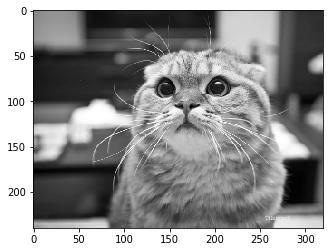

In [27]:
plt.imshow(gray_rgb_cupy.get(), cmap='gray')

In [28]:
%timeit rgb2gray_rgb_cupy(image_cupy)

78.2 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit cupy.asarray(image)

37.6 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
%timeit gray_rgb_cupy.get()

143 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
%timeit gray_rgb_cupy.astype(cupy.uint8).get()

50.9 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
def rgb2gray_dot_cupy(img_in_cupy):
    coef = cupy.array([coef_r, coef_g, coef_b])
    img_gray = cupy.matmul(img_in_cupy, coef)
    return img_gray

In [33]:
gray_dot_cupy = rgb2gray_dot_cupy(image_cupy)
numpy.testing.assert_allclose(gray, gray_dot_cupy.get(), atol=10-4)

In [34]:
%timeit rgb2gray_dot_cupy(image_cupy)

343 µs ± 5.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
